In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from pydlm import dlm, trend, seasonality

In [3]:
from statsmodels.tsa.stattools import acf, pacf
#import statsmodels.tsa.stattools as ts
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
dat = pd.read_csv("../DataRaw/h2weekly.csv")

In [5]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        115 non-null    object
 1   IsCanceled  115 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


In [6]:
dat.shape

(115, 2)

In [7]:
dat.head()

Date  IsCanceled
0  2015-06-21          97
1  2015-06-28         153
2  2015-07-05         228
3  2015-07-12         321
4  2015-07-19         159

In [8]:
dat.tail()

Date  IsCanceled
110  2017-07-30         253
111  2017-08-06         269
112  2017-08-13         341
113  2017-08-20         201
114  2017-08-27         129

In [9]:
dat.IsCanceled.describe()

count    115.000000
mean     287.843478
std      130.266501
min       21.000000
25%      210.500000
50%      293.000000
75%      380.500000
max      666.000000
Name: IsCanceled, dtype: float64

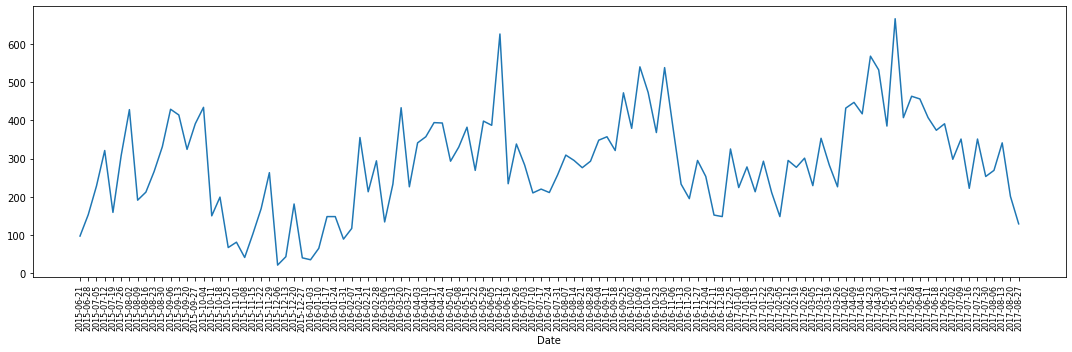

In [10]:
plt.figure(figsize=(15,5), tight_layout=True)
plt.plot('Date','IsCanceled',data=dat)
plt.xlabel("Date")
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [11]:
acf(dat.IsCanceled, nlags=100)

D:\User\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([ 1.00000000e+00,  5.92888954e-01,  5.48850205e-01,  5.37000712e-01,
        4.31682822e-01,  3.25961139e-01,  2.17584692e-01,  1.92590932e-01,
        2.17882282e-01,  8.76673637e-02, -6.57767423e-03, -4.37376375e-02,
       -5.35017367e-02, -1.07476228e-01, -2.38858036e-01, -1.33530318e-01,
       -1.19857607e-01, -8.15091354e-02, -1.29787212e-01, -1.02581967e-01,
       -3.72644614e-02, -7.80160550e-02, -8.68811589e-02, -9.56165589e-02,
        3.17330180e-02,  5.81209235e-02,  7.98602439e-04,  7.07480396e-02,
        2.12908026e-01,  1.31543365e-01,  1.40459741e-01,  5.41431532e-02,
        9.36674861e-02,  7.35118941e-02, -1.65770420e-02, -1.55873812e-02,
        5.79842884e-02,  3.08998448e-02, -7.91610715e-02, -1.13521728e-01,
       -8.99399166e-02, -1.42665885e-01, -1.98968447e-01, -1.69370651e-01,
       -1.43395429e-01, -4.19013527e-02, -6.98633908e-02, -8.33128327e-02,
        2.12559282e-02,  5.84639607e-03, -6.12823731e-04,  1.23748147e-02,
        1.17913156e-01,  

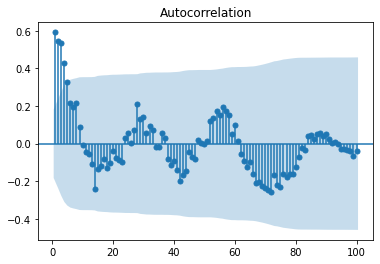

In [12]:
plot_acf(dat.IsCanceled, lags=100, zero=False);

In [13]:
acf(dat.IsCanceled, nlags=100)

D:\User\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([ 1.00000000e+00,  5.92888954e-01,  5.48850205e-01,  5.37000712e-01,
        4.31682822e-01,  3.25961139e-01,  2.17584692e-01,  1.92590932e-01,
        2.17882282e-01,  8.76673637e-02, -6.57767423e-03, -4.37376375e-02,
       -5.35017367e-02, -1.07476228e-01, -2.38858036e-01, -1.33530318e-01,
       -1.19857607e-01, -8.15091354e-02, -1.29787212e-01, -1.02581967e-01,
       -3.72644614e-02, -7.80160550e-02, -8.68811589e-02, -9.56165589e-02,
        3.17330180e-02,  5.81209235e-02,  7.98602439e-04,  7.07480396e-02,
        2.12908026e-01,  1.31543365e-01,  1.40459741e-01,  5.41431532e-02,
        9.36674861e-02,  7.35118941e-02, -1.65770420e-02, -1.55873812e-02,
        5.79842884e-02,  3.08998448e-02, -7.91610715e-02, -1.13521728e-01,
       -8.99399166e-02, -1.42665885e-01, -1.98968447e-01, -1.69370651e-01,
       -1.43395429e-01, -4.19013527e-02, -6.98633908e-02, -8.33128327e-02,
        2.12559282e-02,  5.84639607e-03, -6.12823731e-04,  1.23748147e-02,
        1.17913156e-01,  

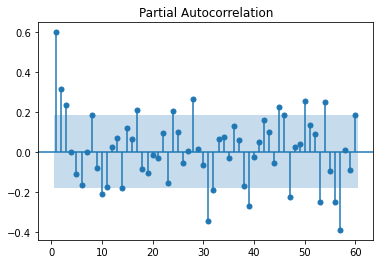

In [14]:
plot_pacf(dat.IsCanceled, lags=60, zero=False);

In [15]:
# A linear trend
linear_trend = trend(degree=1, discount=0.95, name='linear_trend',w=10)
# A seasonality
seasonal52 = seasonality(period=28, discount=0.99, name='seasonal52',w=10)
# Build a simple dlm
simple_dlm = dlm(dat.IsCanceled) + linear_trend + seasonal52

Initializing models...
Initialization finished.
Starting forward filtering...
Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


D:\User\Anaconda\lib\site-packages\pydlm\plot\dlmPlot.py:519: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(str(size[0]) + str(size[1]) + str(location))


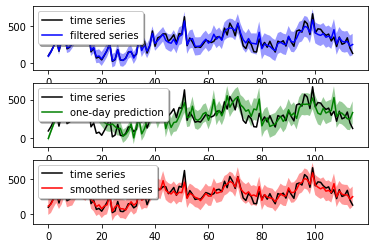

In [16]:
# Fit the model
simple_dlm.fit()
# Plot the fitted results
simple_dlm.turnOff('data points')
simple_dlm.plot()

In [17]:
simple_dlm
simple_dlm.ls()

The static components are
linear_trend (degree = 2)
seasonal52 (degree = 28)
 
There is no dynamic component.
 
There is no automatic component.


In [18]:
np.sqrt(simple_dlm.getMSE())

113.69396928037527

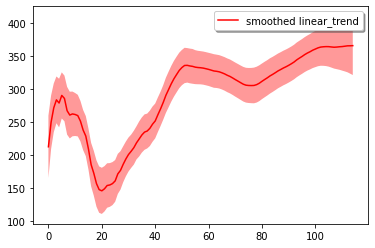

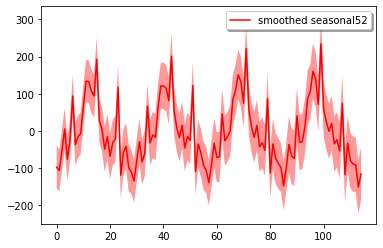

In [19]:
# Plot each component (attribute the time series to each component)
simple_dlm.turnOff('predict plot')
simple_dlm.turnOff('filtered plot')
simple_dlm.plot('linear_trend')
simple_dlm.plot('seasonal52')

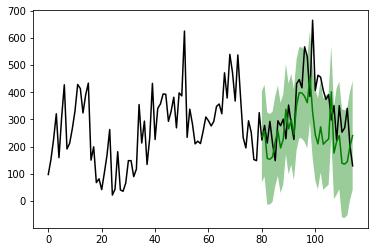

In [20]:
# Plot the prediction give the first 100 weeks and forecast the next 15 weeks.
simple_dlm.plotPredictN(date=80, N=35)

In [21]:
from pydlm import modelTuner
myTuner = modelTuner(method='gradient_descent', loss='mse')
tunedDLM = myTuner.tune(simple_dlm, maxit=100)

The algorithm stops without converging.
Possible reason: some discount is too close to 1 or 0.7 (0.7 is smallest discount that is permissible.


In [22]:
tuned_discounts = myTuner.getDiscounts()

In [23]:
tuned_discounts

[0.99999, 0.99999]

In [24]:
tunedDLM.fit()

In [26]:
np.sqrt(tunedDLM.getMSE())

129.65642328214406